In [1]:
!pip install datasets

In [2]:
import numpy as np # for using np arrays
from unet_dataset import *
from unet_main import *
from unet_model import *
from unet_train import *
from unet_utils import *

# Define the URL and file names


In [3]:
dataset_url = "http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz"
annotations_url = "http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz"
dataset_filename = "images.tar.gz"
annotations_filename = "annotations.tar.gz"

 # Define the download and extraction directory

In [4]:
download_dir = "/content/"
extracted_dir = "/content/"

In [5]:
download_and_extract(dataset_url, download_dir, dataset_filename, extracted_dir)
download_and_extract(annotations_url, download_dir, annotations_filename, extracted_dir)

In [6]:
import os
images_dir = os.path.join(extracted_dir, "images/")
masks_dir = os.path.join(extracted_dir, "annotations/trimaps/")

# Sample Image

(400, 600, 3)
(400, 600)


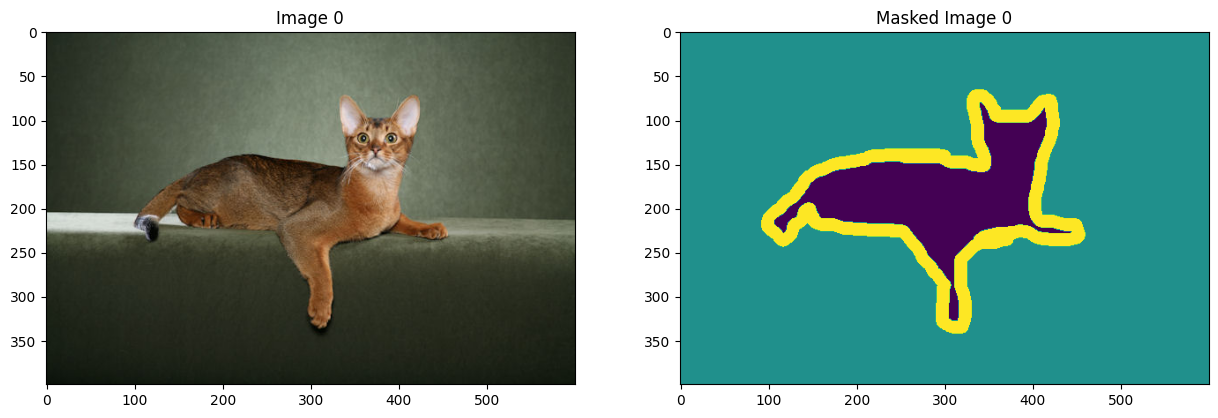

In [7]:
path1 = images_dir
path2 = masks_dir
img, mask = LoadData (path1, path2)
sample_images(path1, path2, img, mask, show_images = 1)

In [8]:
# Define the desired shape
target_shape_img = [128, 128, 3]
target_shape_mask = [128, 128, 1]

In [9]:
# Process data using apt helper function
X, y = PreprocessData(img, mask, target_shape_img, target_shape_mask, path1, path2)

Processing image 7390 out of 7390 images


In [10]:
# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)
print("Y shape:", y.shape)

X Shape: (7390, 128, 128, 3)
Y shape: (7390, 128, 128, 1)


# MP+Tr+BCE

In [11]:
model = UNetModel(use_max_pooling=True, use_transpose_conv=True, use_strided_conv=False,use_upsampling=False, use_dice_loss=False, use_bce=True)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 32)         128       ['conv2d_1[0][0]']            
 Normalization)                                                                               

In [12]:
results, unet, X_train, X_valid, y_train, y_valid = unet_train(model, X, y)

Epoch 1/20
185/185 [==============================] - 28s 62ms/step - loss: 0.7204 - accuracy: 0.6990 - val_loss: 0.5546 - val_accuracy: 0.7774
Epoch 2/20
185/185 [==============================] - 7s 37ms/step - loss: 0.5174 - accuracy: 0.7963 - val_loss: 0.4582 - val_accuracy: 0.8220
Epoch 3/20
185/185 [==============================] - 7s 37ms/step - loss: 0.4416 - accuracy: 0.8296 - val_loss: 0.4157 - val_accuracy: 0.8364
Epoch 4/20
185/185 [==============================] - 7s 37ms/step - loss: 0.4045 - accuracy: 0.8450 - val_loss: 0.4094 - val_accuracy: 0.8406
Epoch 5/20
185/185 [==============================] - 7s 36ms/step - loss: 0.3768 - accuracy: 0.8559 - val_loss: 0.3779 - val_accuracy: 0.8563
Epoch 6/20
185/185 [==============================] - 7s 37ms/step - loss: 0.3426 - accuracy: 0.8700 - val_loss: 0.3685 - val_accuracy: 0.8600
Epoch 7/20
185/185 [==============================] - 7s 36ms/step - loss: 0.3296 - accuracy: 0.8754 - val_loss: 0.3585 - val_accuracy: 0.862

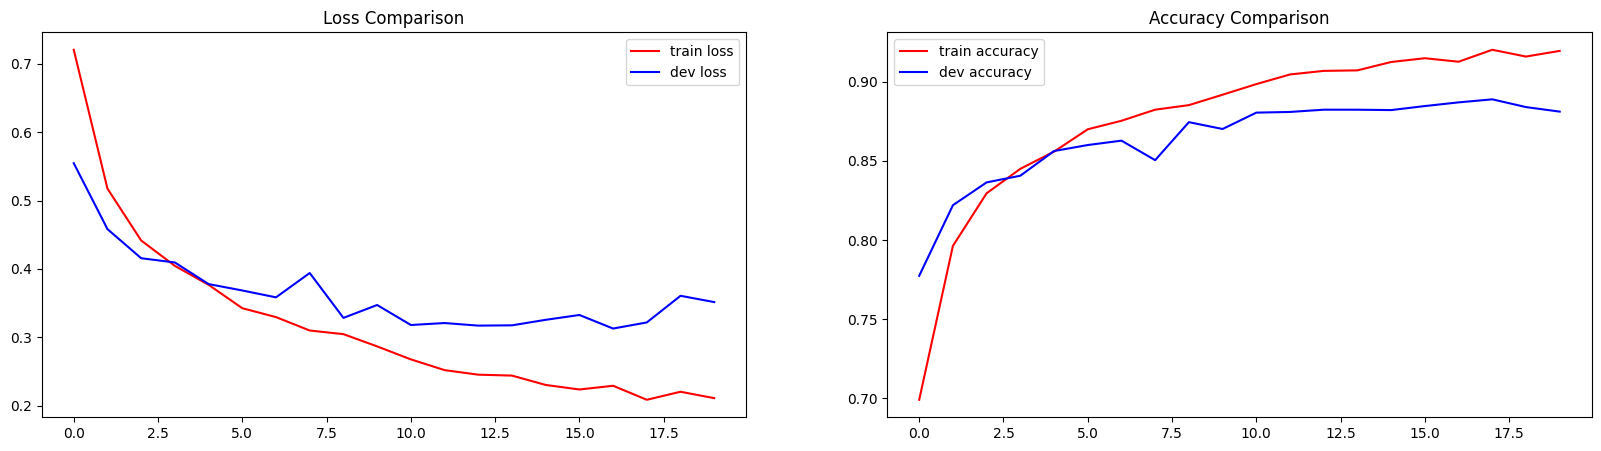

In [13]:
model_metrics(results)

1/1 [==============================] - 1s 683ms/step


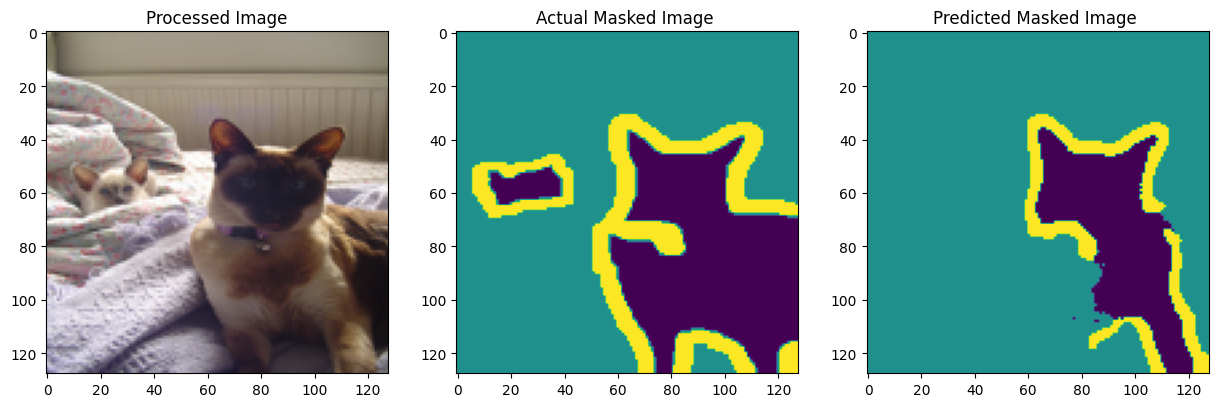

In [14]:
unet.evaluate(X_valid, y_valid)
index = 700
output_visualize(X_valid, unet, y_valid, index)

# MP+Tr+Dice Loss

In [15]:
model = UNetModel(use_max_pooling=True, use_transpose_conv=True, use_strided_conv=False,use_upsampling=False, use_dice_loss=True, use_bce=False)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 128, 128, 32)         896       ['input_2[0][0]']             
                                                                                                  
 conv2d_21 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_20[0][0]']           
                                                                                                  
 batch_normalization_5 (Bat  (None, 128, 128, 32)         128       ['conv2d_21[0][0]']           
 chNormalization)                                                                           

In [16]:
results, unet, X_train, X_valid, y_train, y_valid = unet_train(model, X, y)

Epoch 1/20
185/185 [==============================] - 17s 42ms/step - loss: 0.5204 - accuracy: 0.6152 - val_loss: 0.4573 - val_accuracy: 0.6498
Epoch 2/20
185/185 [==============================] - 7s 36ms/step - loss: 0.3637 - accuracy: 0.7341 - val_loss: 0.2722 - val_accuracy: 0.8113
Epoch 3/20
185/185 [==============================] - 7s 36ms/step - loss: 0.2608 - accuracy: 0.8189 - val_loss: 0.2592 - val_accuracy: 0.8225
Epoch 4/20
185/185 [==============================] - 7s 36ms/step - loss: 0.2417 - accuracy: 0.8338 - val_loss: 0.2382 - val_accuracy: 0.8344
Epoch 5/20
185/185 [==============================] - 7s 36ms/step - loss: 0.2265 - accuracy: 0.8461 - val_loss: 0.2248 - val_accuracy: 0.8466
Epoch 6/20
185/185 [==============================] - 7s 36ms/step - loss: 0.2165 - accuracy: 0.8543 - val_loss: 0.2201 - val_accuracy: 0.8507
Epoch 7/20
185/185 [==============================] - 7s 36ms/step - loss: 0.2104 - accuracy: 0.8591 - val_loss: 0.2139 - val_accuracy: 0.853

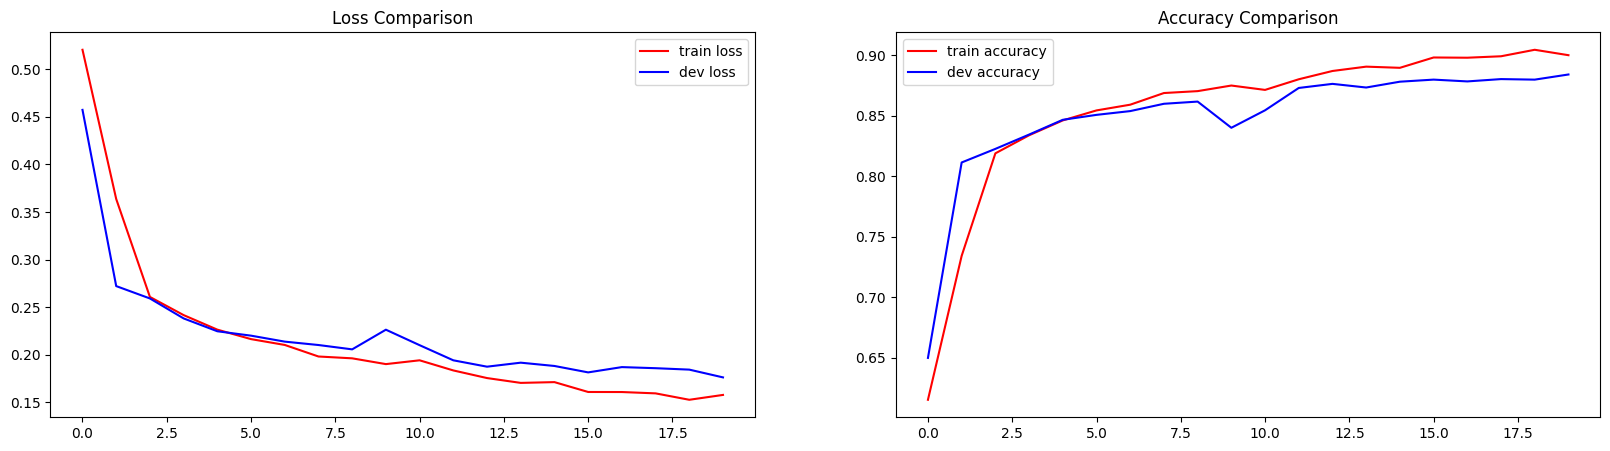

In [17]:
model_metrics(results)

1/1 [==============================] - 0s 319ms/step


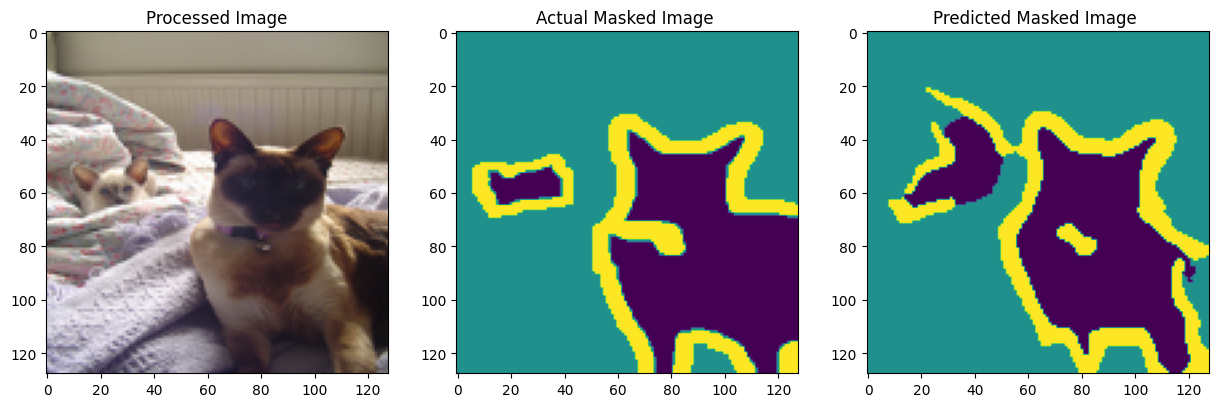

In [18]:
unet.evaluate(X_valid, y_valid)
index = 700
output_visualize(X_valid, unet, y_valid, index)

# StrConv+Tr+BCE


In [19]:
model = UNetModel(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,use_upsampling=False, use_dice_loss=False, use_bce=True)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_40 (Conv2D)          (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_41 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_40[0][0]']           
                                                                                                  
 batch_normalization_10 (Ba  (None, 128, 128, 32)         128       ['conv2d_41[0][0]']           
 tchNormalization)                                                                          

In [20]:
results, unet, X_train, X_valid, y_train, y_valid = unet_train(model, X, y)

Epoch 1/20
185/185 [==============================] - 19s 45ms/step - loss: 0.7366 - accuracy: 0.6863 - val_loss: 0.6032 - val_accuracy: 0.7598
Epoch 2/20
185/185 [==============================] - 7s 39ms/step - loss: 0.5576 - accuracy: 0.7776 - val_loss: 0.4984 - val_accuracy: 0.8039
Epoch 3/20
185/185 [==============================] - 7s 39ms/step - loss: 0.4803 - accuracy: 0.8118 - val_loss: 0.4610 - val_accuracy: 0.8211
Epoch 4/20
185/185 [==============================] - 7s 39ms/step - loss: 0.4280 - accuracy: 0.8344 - val_loss: 0.4088 - val_accuracy: 0.8401
Epoch 5/20
185/185 [==============================] - 7s 39ms/step - loss: 0.3947 - accuracy: 0.8480 - val_loss: 0.3965 - val_accuracy: 0.8451
Epoch 6/20
185/185 [==============================] - 7s 39ms/step - loss: 0.3703 - accuracy: 0.8581 - val_loss: 0.3700 - val_accuracy: 0.8581
Epoch 7/20
185/185 [==============================] - 7s 39ms/step - loss: 0.3498 - accuracy: 0.8662 - val_loss: 0.3847 - val_accuracy: 0.853

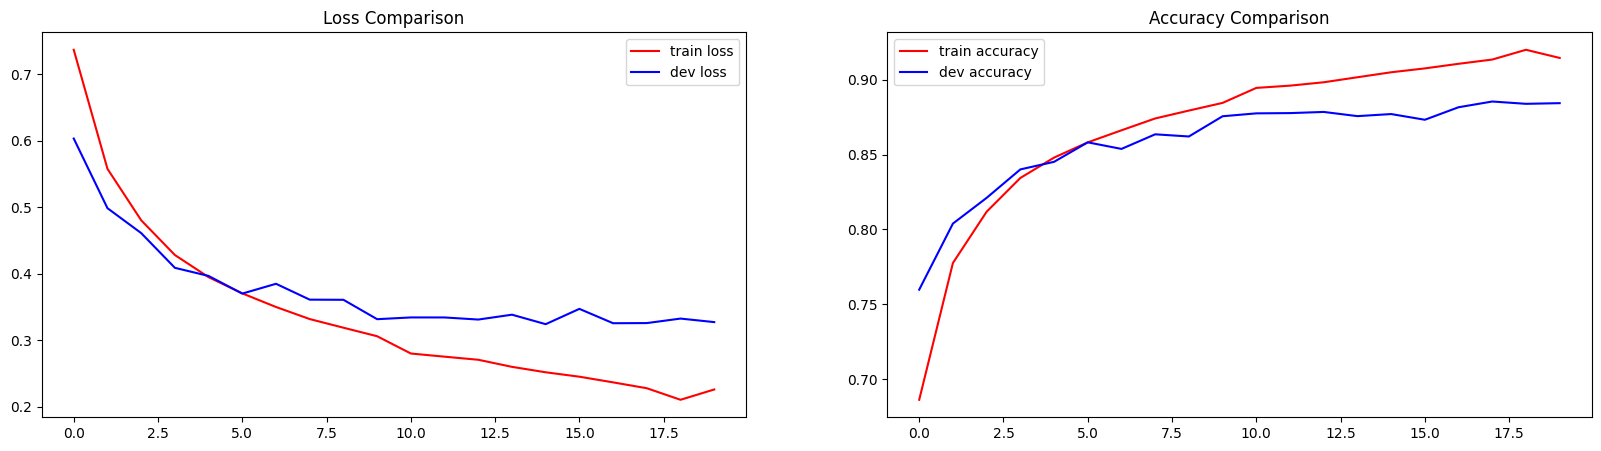

In [21]:
model_metrics(results)

1/1 [==============================] - 0s 409ms/step


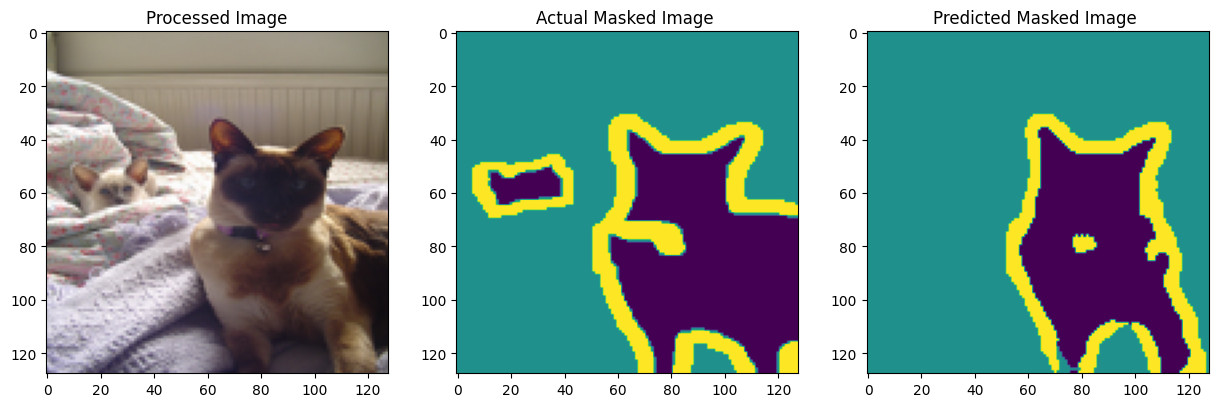

In [22]:
unet.evaluate(X_valid, y_valid)
index = 700
output_visualize(X_valid, unet, y_valid, index)

# StrConv+Ups+Dice Loss

In [23]:
model = UNetModel(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,use_upsampling=True, use_dice_loss=True, use_bce=False)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_64 (Conv2D)          (None, 128, 128, 32)         896       ['input_4[0][0]']             
                                                                                                  
 conv2d_65 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_64[0][0]']           
                                                                                                  
 batch_normalization_15 (Ba  (None, 128, 128, 32)         128       ['conv2d_65[0][0]']           
 tchNormalization)                                                                          

In [24]:
results, unet, X_train, X_valid, y_train, y_valid = unet_train(model, X, y)

Epoch 1/20
185/185 [==============================] - 19s 46ms/step - loss: 0.4361 - accuracy: 0.6951 - val_loss: 0.3328 - val_accuracy: 0.7539
Epoch 2/20
185/185 [==============================] - 8s 42ms/step - loss: 0.2895 - accuracy: 0.7950 - val_loss: 0.2686 - val_accuracy: 0.8181
Epoch 3/20
185/185 [==============================] - 8s 42ms/step - loss: 0.2531 - accuracy: 0.8247 - val_loss: 0.2453 - val_accuracy: 0.8339
Epoch 4/20
185/185 [==============================] - 8s 42ms/step - loss: 0.2425 - accuracy: 0.8323 - val_loss: 0.2656 - val_accuracy: 0.8189
Epoch 5/20
185/185 [==============================] - 8s 42ms/step - loss: 0.2345 - accuracy: 0.8393 - val_loss: 0.2454 - val_accuracy: 0.8338
Epoch 6/20
185/185 [==============================] - 8s 42ms/step - loss: 0.2236 - accuracy: 0.8481 - val_loss: 0.2301 - val_accuracy: 0.8445
Epoch 7/20
185/185 [==============================] - 8s 42ms/step - loss: 0.2149 - accuracy: 0.8553 - val_loss: 0.2185 - val_accuracy: 0.853

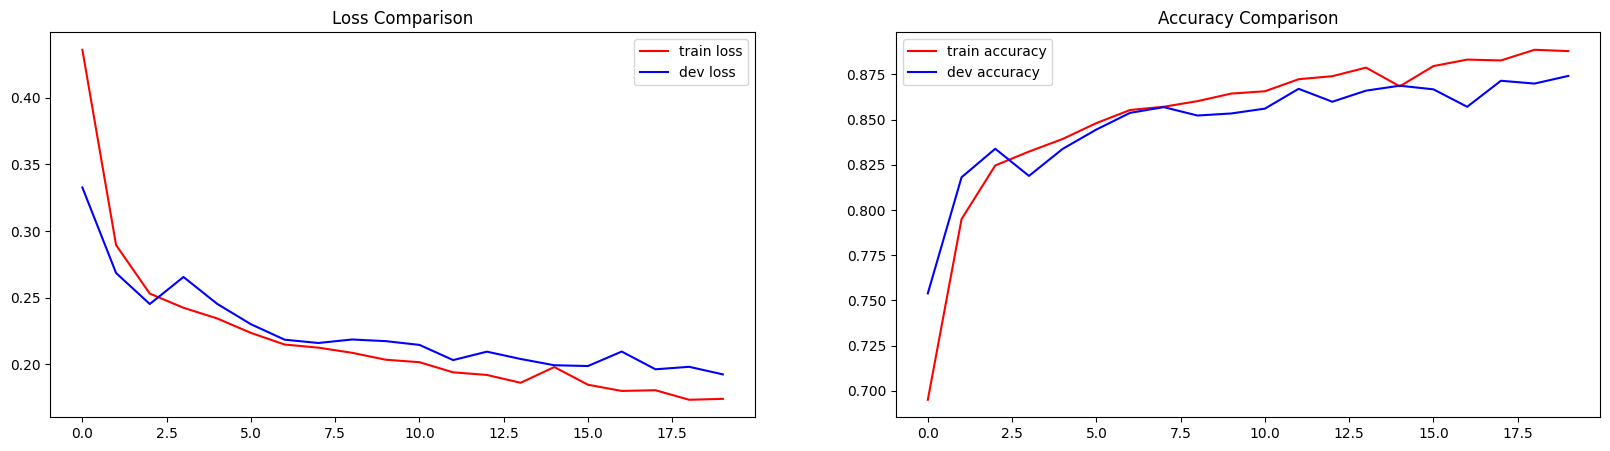

In [25]:
model_metrics(results)

1/1 [==============================] - 0s 298ms/step


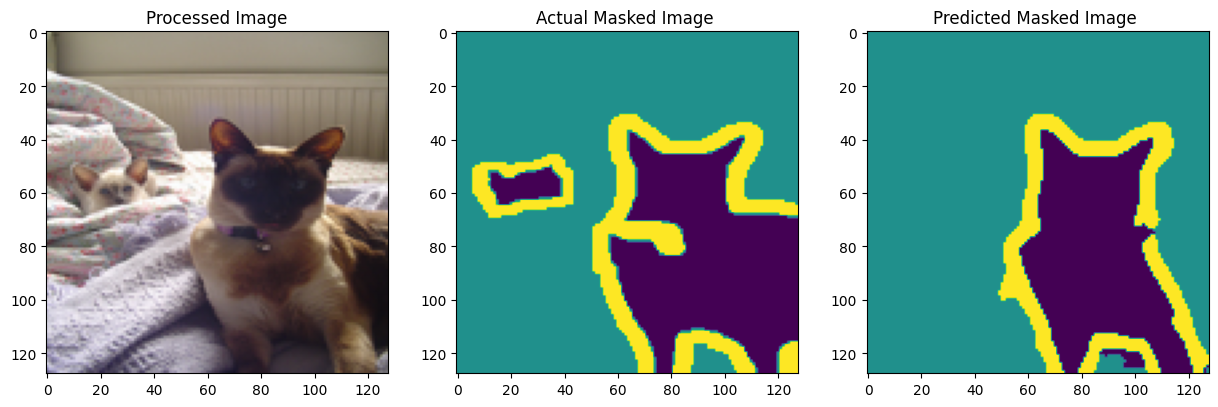

In [26]:
unet.evaluate(X_valid, y_valid)
index = 700
output_visualize(X_valid, unet, y_valid, index)